In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime , date
from sqlalchemy import create_engine
import pyodbc


In [2]:
engine=create_engine('mssql+pyodbc://CVIADPNFD03/SiteMonitor?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')
df=pd.read_sql("select batch_id,site.url,report.site_id,report.credential_id,report.is_working,report.created_at from report inner join	site on Report.site_id=Site.id",con=engine)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223364 entries, 0 to 223363
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   batch_id       223364 non-null  object        
 1   url            223364 non-null  object        
 2   site_id        223364 non-null  int64         
 3   credential_id  223364 non-null  int64         
 4   is_working     223364 non-null  bool          
 5   created_at     223364 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 8.7+ MB


In [19]:
#filtering the date to get only 2023 values on which we will perform visulization 
df['created_at']=pd.to_datetime(df['created_at'].dt.date)
df_2023=df[df['created_at'].dt.year==2023]

In [20]:
df_2023['credential_id']=df_2023['credential_id'].map({1:'Internal',2:'External'})
df_2023

C:\Users\amamidwar\AppData\Local\Temp\ipykernel_24544\1279006791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['credential_id']=df_2023['credential_id'].map({1:'Internal',2:'External'})


,batch_id,url,site_id,credential_id,is_working,created_at
62508,01012023121018,https://nextgen.shareablee.com/,4,Internal,True,2023-01-01
62509,01012023121018,https://auth-jwt.comscore.com/,5,Internal,True,2023-01-01
62510,01012023121018,https://auth-jwt.comscore.com/Doc/ApiMethods,6,Internal,True,2023-01-01
62511,01012023121018,http://auth-api.csa.comscore.com/Help,7,Internal,True,2023-01-01
62512,01012023121018,http://auth-api.csa.comscore.com/,8,Internal,True,2023-01-01
...,...,...,...,...,...,...
223359,06102023011008,https://ratings.comscore.com/,13,External,True,2023-06-10
223360,06102023011008,https://direct.comscore.com/,14,External,True,2023-06-10
223361,06102023011008,https://adfx.comscore.com/,15,External,True,2023-06-10
223362,06102023011008,https://national-stationview.rentrak.com/,16,External,True,2023-06-10


In [21]:
#function to get all batch id's for today
def todaysdata(x):
    df=x.sort_values('created_at',ascending=False).copy()
    df=df.loc[(df['created_at'].dt.date==date.today()),:]
    df=df.drop('created_at',axis=1)
    return df

In [22]:
df_2023[df_2023['is_working']==False]


,batch_id,url,site_id,credential_id,is_working,created_at
71294,01092023074028,https://mymetrix.comscore.com/app/report.aspx,12,Internal,False,2023-01-09
71296,01092023074028,https://direct.comscore.com/,14,Internal,False,2023-01-09
71385,01092023094023,https://nextgen.shareablee.com/,4,External,False,2023-01-09
71396,01092023101022,https://nextgen.shareablee.com/,4,Internal,False,2023-01-09
71407,01092023101022,https://nextgen.shareablee.com/,4,External,False,2023-01-09
...,...,...,...,...,...,...
221915,06082023094009,https://tv.comscore.com,11,Internal,False,2023-06-08
221916,06082023094009,https://mymetrix.comscore.com/app/report.aspx,12,Internal,False,2023-06-08
221917,06082023094009,https://ratings.comscore.com/,13,Internal,False,2023-06-08
221918,06082023094009,https://direct.comscore.com/,14,Internal,False,2023-06-08


In [23]:
df_today= todaysdata(df_2023)
df_today['is_working']==False

223363    False
223314    False
223307    False
223308    False
223309    False
          ...  
223339    False
223340    False
223341    False
223336    False
223342    False
Name: is_working, Length: 78, dtype: bool

no of counts of sites working and not working for Today


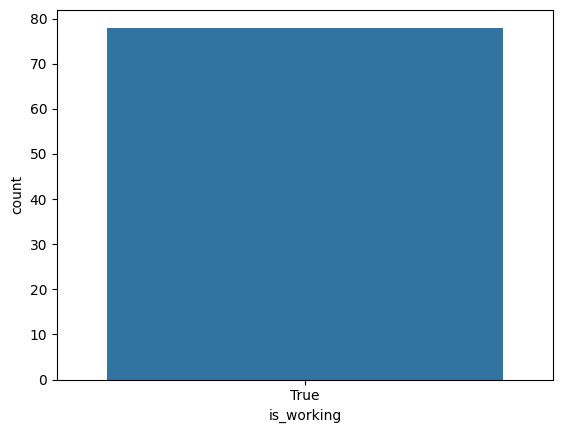

In [24]:
sns.countplot(x='is_working',data=df_today)
print('no of counts of sites working and not working for Today')

In [25]:
target_date=pd.to_datetime('2023-06-07').date()
#df_2023=df_2023[df_2023['created_at']==target_date]
#type(target_date)
df_2023=df_2023[df_2023['created_at'].dt.date==target_date]
#df_2023=df_2023[( df_2023['credential_id']== 'Internal') & (df_2023['created_at'].dt.date==target_date)]
df_2023

,batch_id,url,site_id,credential_id,is_working,created_at
219542,06072023121006,https://nextgen.shareablee.com/,4,Internal,True,2023-06-07
219543,06072023121006,https://auth-jwt.comscore.com/,5,Internal,True,2023-06-07
219544,06072023121006,https://auth-jwt.comscore.com/Doc/ApiMethods,6,Internal,True,2023-06-07
219545,06072023121006,http://auth-api.csa.comscore.com/Help,7,Internal,True,2023-06-07
219546,06072023121006,http://auth-api.csa.comscore.com/,8,Internal,True,2023-06-07
...,...,...,...,...,...,...
220785,06072023114007,https://ratings.comscore.com/,13,External,True,2023-06-07
220786,06072023114007,https://direct.comscore.com/,14,External,True,2023-06-07
220787,06072023114007,https://adfx.comscore.com/,15,External,False,2023-06-07
220788,06072023114007,https://national-stationview.rentrak.com/,16,External,True,2023-06-07


no of  sites working for 8th june


<Axes: xlabel='is_working', ylabel='count'>

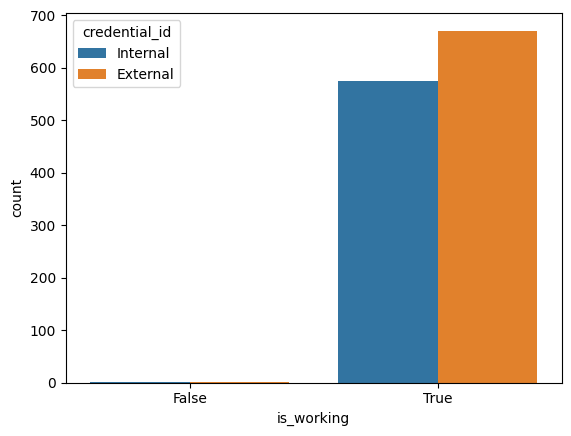

In [26]:
print('no of  sites working for 8th june')
sns.countplot(x='is_working',data=df_2023, hue='credential_id')


In [27]:
df_2023_failed_internal= df_2023[(df_2023['is_working']==False) & (df_2023['credential_id']=='Internal')]
df_2023_failed_external= df_2023[(df_2023['is_working']==False) & (df_2023['credential_id']=='External')]
df_2023_failed_internal['url'].unique()
df_2023_failed_external

,batch_id,url,site_id,credential_id,is_working,created_at
220787,06072023114007,https://adfx.comscore.com/,15,External,False,2023-06-07


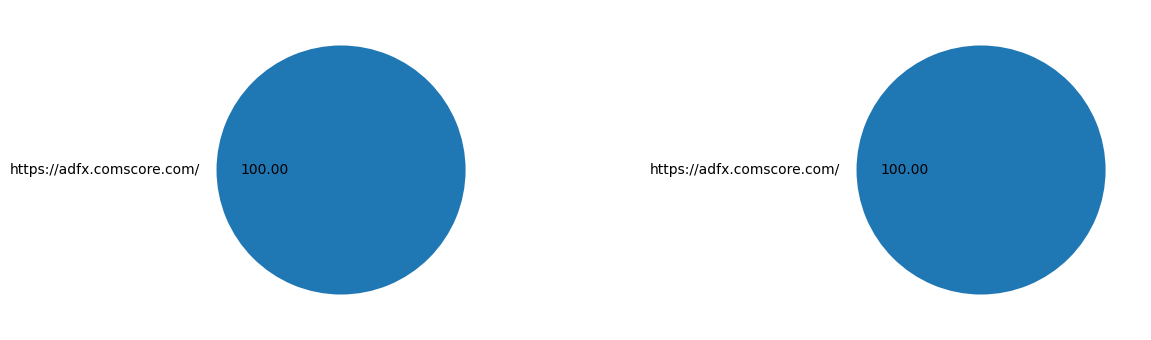

In [28]:
fig,(ax1,ax2)=plt.subplots(1,2)
fig=(10,8)
ax1.pie(data=df_2023_failed_internal,x=df_2023_failed_internal['url'].value_counts(),wedgeprops = { 'linewidth' :5, 'edgecolor' : 'white' },autopct='%.2f',labels=df_2023_failed_internal['url'].unique())
ax2.pie(data=df_2023_failed_external,x=df_2023_failed_external['url'].value_counts(),wedgeprops = { 'linewidth' :5, 'edgecolor' : 'white' },autopct='%.2f',labels=df_2023_failed_external['url'].unique())

plt.subplots_adjust(left=0,right=1.5,wspace=1,hspace=1)
plt.show()
